In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [2]:
years = [4.07, 6.54, 1.39, 6.17, 5.89, 4.76, 3.67]
code  = [  1 ,  0  ,  1  ,  0  ,  1  ,  1  ,  0  ]

In [3]:
data = pd.DataFrame({'YEARS': years, 'CODE': code},)

In [4]:
data

,CODE,YEARS
0,1,4.07
1,0,6.54
2,1,1.39
3,0,6.17
4,1,5.89
5,1,4.76
6,0,3.67


censored subjects are encoded 0, death events 1

In [9]:
from statsmodels.stats import proportion
conf_int = proportion.proportion_confint(8, 9, method='binom_test')
conf_int

(0.5565115333605972, 0.9943169550119749)

In [5]:
kmf = KaplanMeierFitter()

In [6]:
kmf.fit(years, code)

<lifelines.KaplanMeierFitter: fitted with 7 observations, 3 censored>

Populating the interactive namespace from numpy and matplotlib


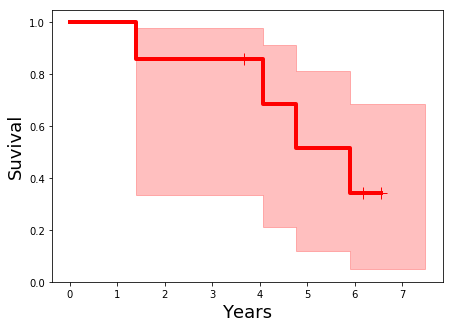

In [51]:
%pylab inline
figsize(7,5)
kmf.plot(show_censors=True, legend=False,
        lw=4, c='red')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Suvival', fontsize=18);

In [27]:
kmf.median_

5.89

In [28]:
kmf.survival_function_

,KM_estimate
timeline,
0.00,1.000000
1.39,0.857143
3.67,0.857143
4.07,0.685714
4.76,0.514286
5.89,0.342857
6.17,0.342857
6.54,0.342857


In [34]:
print(6/7)
print(5/7)
print(5/6)

0.8571428571428571
0.7142857142857143
0.8333333333333334


In [35]:
# calculating the 95% CI using the Wald method
p = (6+2)/(7+2)

In [36]:
W = 2 * (p*(1-p)/(7+4))**.5

In [37]:
p-W

0.6993771410172351

In [38]:
p+W

1.0784006367605425